# Seattle Public Library: Supplementary Analysis

Sara Rasmussen (saralr2)  

To inform the model in my final project, I consulted the City of Seattle's Open Data Portal. The city provides a database of all materials checked out from all locations of the Seattle Public Library, including computers, from April 2005 to the present. Laptops are available at 16 branches and can be used for up to 90 minutes. As of 2020, there are 162 laptops in inventory, although there's no guarantee that many have been available since the service began. In the interest of patron privacy, the dataset does not specify at which branch the laptop was checked out. Prior to COVID-19 closures, most branches appeared to operate from 10am to 6pm (18h). 

Questions to answer: 
- What is the distribution of laptop usage by hour? 
- How many patrons use laptops per day?

**Bibliography:** 
- Seattle Public Library. "FlexTech - Laptops." Accessed November 3, 2020. https://seattle.bibliocommons.com/item/show/2919580030. 
- City of Seattle. "Checkouts By Title (Physical Items)." November 19, 2020. https://data.seattle.gov/Community/Checkouts-By-Title-Physical-Items-/5src-czff.
- City of Seattle. "Integrated Library System (ILS) Data Dictionary." November 6, 2020. https://data.seattle.gov/Community/Integrated-Library-System-ILS-Data-Dictionary/pbt3-ytbc. 

In [2]:
import pandas as pd
import datetime as dt

In [3]:
# Read in Seattle Public Libraries checkout by timestamp
# Set the ITEMTYPE, CHECKOUTYEAR, $LIMIT
l_2016 = pd.read_json("https://data.seattle.gov/resource/5src-czff.json?itemtype=alaptop&checkoutyear=2016&$limit=3000")
l_2017 = pd.read_json("https://data.seattle.gov/resource/5src-czff.json?itemtype=alaptop&checkoutyear=2017&$limit=3000")
l_2018 = pd.read_json("https://data.seattle.gov/resource/5src-czff.json?itemtype=alaptop&checkoutyear=2018&$limit=3000")
l_2019 = pd.read_json("https://data.seattle.gov/resource/5src-czff.json?itemtype=alaptop&checkoutyear=2019&$limit=4000")
laptops = pd.concat([l_2016,l_2017,l_2018,l_2019],axis=0)
laptops = laptops[['id','itemtype','checkoutdatetime','checkoutyear']]
laptops.dtypes

id                  float64
itemtype             object
checkoutdatetime     object
checkoutyear          int64
dtype: object

In [4]:
laptops #12,232 rows of data

,id,itemtype,checkoutdatetime,checkoutyear
0,2.016073e+26,alaptop,2016-07-27T18:28:00.000,2016
1,2.016010e+26,alaptop,2016-01-04T15:19:00.000,2016
2,2.016073e+26,alaptop,2016-07-27T18:52:00.000,2016
3,2.016122e+26,alaptop,2016-12-16T15:36:00.000,2016
4,2.016071e+26,alaptop,2016-07-08T13:36:00.000,2016
...,...,...,...,...
3995,2.019092e+26,alaptop,2019-09-20T16:21:00.000,2019
3996,2.019092e+26,alaptop,2019-09-20T11:26:00.000,2019
3997,2.019092e+26,alaptop,2019-09-20T16:03:00.000,2019
3998,2.019092e+26,alaptop,2019-09-20T12:24:00.000,2019


In [5]:
# Extract checkout HOUR into separate column
laptops['checkoutdatetime'] = pd.to_datetime(laptops['checkoutdatetime'])
laptops['checkouthour'] = laptops['checkoutdatetime'].dt.hour
laptops

,id,itemtype,checkoutdatetime,checkoutyear,checkouthour
0,2.016073e+26,alaptop,2016-07-27 18:28:00,2016,18
1,2.016010e+26,alaptop,2016-01-04 15:19:00,2016,15
2,2.016073e+26,alaptop,2016-07-27 18:52:00,2016,18
3,2.016122e+26,alaptop,2016-12-16 15:36:00,2016,15
4,2.016071e+26,alaptop,2016-07-08 13:36:00,2016,13
...,...,...,...,...,...
3995,2.019092e+26,alaptop,2019-09-20 16:21:00,2019,16
3996,2.019092e+26,alaptop,2019-09-20 11:26:00,2019,11
3997,2.019092e+26,alaptop,2019-09-20 16:03:00,2019,16
3998,2.019092e+26,alaptop,2019-09-20 12:24:00,2019,12


In reviewing the data, I noticed a few outliers: 1 check-out in the 8:00 hour, and a handful in the 9:00 and 20:00 hours.  

This stands out because the library isn't open to the public at that time. I would assume that either these checkouts were erroneous or made before a change in operating hours. I am excluding them.

In [6]:
# Drop the checkouts in 8, 9, and 20 hours 
laptops = laptops.loc[laptops['checkouthour'] != 8]
laptops = laptops.loc[laptops['checkouthour'] != 9]
laptops = laptops.loc[laptops['checkouthour'] != 20]

In [7]:
# Group by hourly counts, create a column to express that hour's percentage of overall use
usage_by_hour = laptops.groupby(['checkouthour']).count()
usage_by_hour = usage_by_hour[['itemtype']]
usage_by_hour['pct'] = usage_by_hour['itemtype'] / usage_by_hour['itemtype'].sum()
usage_by_hour

,itemtype,pct
checkouthour,,
10,442,0.036158
11,566,0.046302
12,650,0.053174
13,1682,0.137598
14,2043,0.167130
15,2717,0.222268
16,2433,0.199035
17,1074,0.087860
18,580,0.047448


## Afternoons are popular
As the data shows, most laptop checkouts in the last 4 years have been in the afternoon. More than 70% of checkouts were between 13:00 and 17:00 (1 p.m. and 5 p.m.). The 15:00 hour, from 3 p.m. to 4 p.m., is the single most popular checkout time. 

I would suspect that this has something to do with the time when school lets out, and students come to use the library until their parents are off work.

Text(0.5, 1.0, 'All laptop checkouts by hour, 2016-2020')

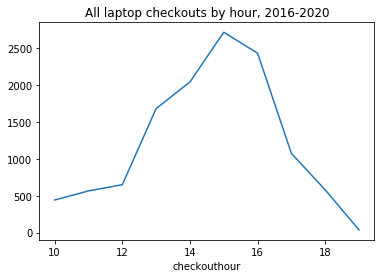

In [8]:
usage_by_hour['itemtype'].plot().set_title("All laptop checkouts by hour, 2016-2020")

In [9]:
# Out of curiousity, how has use changed over the last four years? 
usage_by_year = laptops.groupby(['checkouthour','checkoutyear']).count()
usage_by_year[['itemtype']]

itemtype
checkouthour checkoutyear          
10           2016                32
             2017               170
             2018               136
             2019               104
11           2016               136
             2017               133
             2018               152
             2019               145
12           2016               167
             2017               188
             2018               160
             2019               135
13           2016               539
             2017               424
             2018               321
             2019               398
14           2016               399
             2017               637
             2018               412
             2019               595
15           2016               407
             2017               658
             2018               726
             2019               926
16           2016               319
             2017               476
             2018               614
             2019              1024
17           2016               123
             2017               195
             2018               304
             2019               452
18           2016                93
             2017               100
             2018               170
             2019               217
19           2016                15
             2017                15
             2018                 5
             2019                 2

Text(0.5, 1.0, 'Laptop checkouts by hour and year')

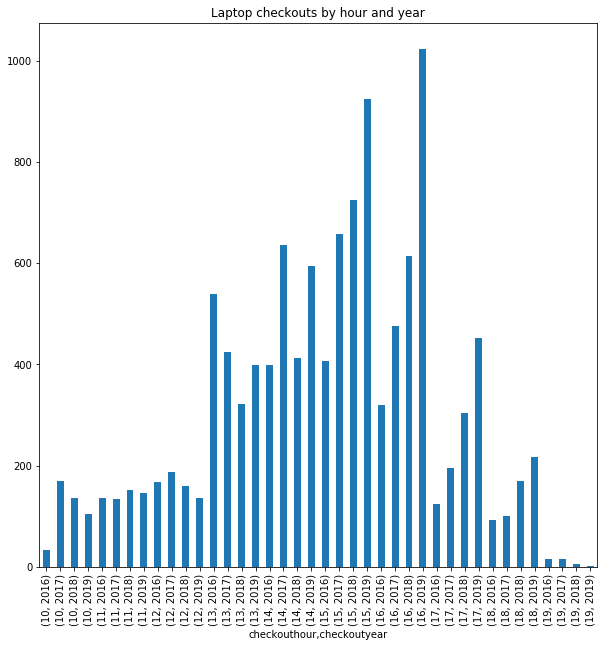

In [10]:
usage_by_year['itemtype'].plot.bar(figsize=(10,10)).set_title("Laptop checkouts by hour and year")

When looking more closely to the hourly breakdown by year, it's clear that overall use of the laptops has increased over time. 

Also note, the 16:00 hour was marginally more popular than the 15:00 hour in 2019. 

## Laptop checkouts by day

Next, I pull out the counts of laptop checkouts by day, to get a sense of the min, mean, and max. In the last four years, it appears that there were on average 18 checkouts per day, with a minimum of 1 checkout per day, and a maximum of 90 checkouts per day. In 2019, the mean was 36 per day, with a min of 9 and max of 81. 

These figures are, of course, relative to the number of available devices, which we cannot know for certain historically, although we know 162 devices are available in 2020.  

In [134]:
laptops['checkoutday'] = laptops['checkoutdatetime'].dt.date
by_day_4yr = laptops.groupby(['checkoutday']).count()
by_day_2019 = laptops[laptops['checkoutyear'] == 2019].groupby(['checkoutday']).count()
sum4yr = by_day_4yr[['itemtype']].describe()
sum2019 = by_day_2019[['itemtype']].describe()
sum4yr

,itemtype
count,675.000000
mean,18.111111
std,18.907500
min,1.000000
25%,6.000000
50%,10.000000
75%,25.000000
max,90.000000


In [135]:
sum2019

,itemtype
count,109.000000
mean,36.678899
std,16.937183
min,9.000000
25%,24.000000
50%,34.000000
75%,48.000000
max,81.000000


In [137]:
# The day with the single most laptop checkouts (90) was Oct. 29, 2018. 
# Let's check out the breakdown of use by hour:
laptops['checkoutday'] = pd.to_datetime(laptops['checkoutday'])
oct29 = laptops[laptops['checkoutday'] == dt.datetime(2018, 10, 29)].groupby(['checkouthour']).count()
oct29[['itemtype']]

,itemtype
checkouthour,
10,3
11,4
12,2
13,7
14,5
15,15
16,21
17,26
18,7


Just curious again, what's the most popular day of the week? Wednesday, apparently!

Text(0.5, 1.0, 'Count of laptop check-outs per day, 2016-2020')

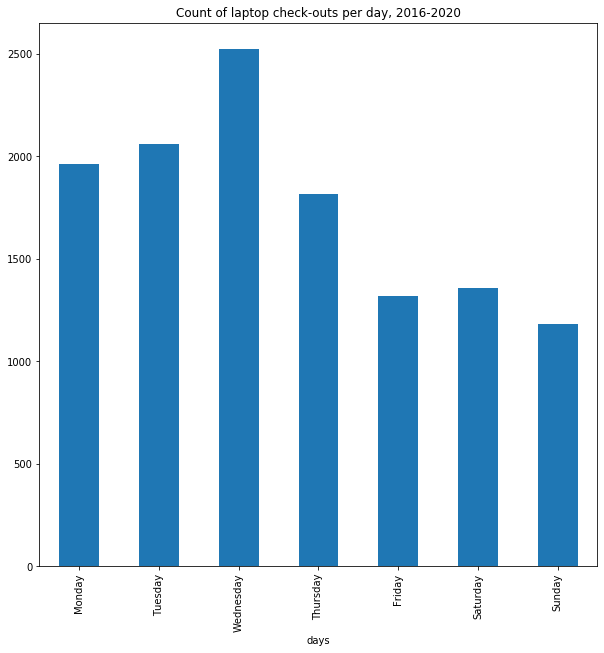

In [26]:
# Note, in pandas, Monday = 0, Tuesday = 1, etc. 
# # Source: IS 597PR classmates Enshi, Vivian and Cheng-Chen; https://github.com/yihsuanliao/2020Fall_projects
laptops['dayofweek'] = laptops['checkoutdatetime'].dt.dayofweek
day_of_week = laptops.groupby(['dayofweek']).count()
fig = day_of_week['itemtype'] 
days = pd.Series(fig.to_list(), name="Count", index=pd.Index(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], name="days"))
days.plot.bar(figsize=(10,10)).set_title("Count of laptop check-outs per day, 2016-2020")